# CODE FILE 1 FOR GROUP 6 - Data Exploration, Probability Analysis and Classification Modeling

# DATA EXPLORATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [2]:
#Importing dataset for regression analysis
diamonds=pd.read_csv("diamonds.csv")

#Importing data for classification analysis
HR_Analytics=pd.read_csv("HR_Analytics.csv")

In [14]:
print("\n"+"Diamonds Data Snapshot below:"+"\n\n")
diamonds.head(10)


Diamonds Data Snapshot below:




,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [107]:
#Data types of all variables in diamond dataset.
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [125]:
#Defined a function to extract unique values in the categorical variables in a dataset
#df is the dataset passed to the function as a dataframe, VARS is list of categorical variables passed ot the function
def get_unique_class(df,VARS):             
    for x in VARS:
        print("\n{}:".format(x),np.sort(df[x].unique()))

In [126]:
#Created list of categorical variables in diamond dataset
cat_vars=["cut", "color", "clarity"]

#called get_unique_class function to print unique classes in each of the variables in cat_vars
print("Categorical variables with unique classes of text type:\n")
get_unique_class(diamonds, cat_vars)

Categorical variables with unique classes of text type:


cut: ['Fair' 'Good' 'Ideal' 'Premium' 'Very Good']

color: ['D' 'E' 'F' 'G' 'H' 'I' 'J']

clarity: ['I1' 'IF' 'SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2']


### Purpose of the Dataset: Prediction of diamond pricing using multiple regression techniques and perform model comparison for accuracy of results.

### Data type of variables in the Diamonds dataset:

## <bullet> <bold> 1. cut, color and clarity are the CATEGORICAL variables that are used in the dataset .

    ##### Cut - this implies the quality of the diamond cutting and can be one of these values:
                'Ideal' 'Premium' 'Good' 'Very Good' 'Fair'

    ##### color - as the name suggests implies the diamond colour and can be one of these values:
                  'D' 'E' 'F' 'G' 'H' 'I' 'J'
                  D (best) to J (worst)

#### clarity - implies a measurement of how clear the diamond is, takes one of the below values in order:

                (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
    
## <bullet> <bold> 2. Rest all the variables below are float or continuous variables and represents numerical characterstics of the diamond as mentioned below:

    ##### depth: length in mm
    
    ##### table: width of top of diamond relative to widest point
    
    ##### price: price in US dollars
    
    ##### x: length in mm
    ##### y: width in mm
    ##### z: depth in mm
    ##### depth: total % depth , determines how much of that light reflects back up to the observer's eye.
          depth% is calculated by dividing the diamond's total height by its total width . Lower the depth , less is the
          sparkle and brilliance if the diamond.
    
           [Source link] (https://www.torresjewelco.com.au/diamonds/education/depth-table-percentage.html#:~:text=The%20lower%20the%20depth%20percentage,light%20and%20offer%20maximum%20brilliance.)
     
    

In [94]:
print("\n"+"HR Data Snapshot below:"+"\n\n")
HR_Analytics.head(10)


HR Data Snapshot below:




,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [108]:
#Data types of all variables in HR  dataset.
HR_Analytics.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [129]:
#Created list of categorical variables from HR_Analytics dataset that has text type values 
cat_vars1=["Gender", "Attrition", "Department", "EducationField", "BusinessTravel", "MaritalStatus", "JobRole", "OverTime"]

#Created list of categorical variables from HR_Analytics dataset that has numeric type values 
cat_vars2=["Education", "EnvironmentSatisfaction","JobInvolvement","JobLevel","JobSatisfaction","PerformanceRating",
           "RelationshipSatisfaction", "WorkLifeBalance", "DistanceFromHome"]

#called get_unique_class function to print unique classes in each of the variables in cat_vars1
print("Categorical variables with unique classes of text type:\n")
get_unique_class(HR_Analytics, cat_vars1)

#called get_unique_class function to print unique classes in each of the variables in cat_vars2
print("\n\nCategorical variables with unique classes of numeric type:\n")
get_unique_class(HR_Analytics, cat_vars2)

Categorical variables with unique classes of text type:


Gender: ['Female' 'Male']

Attrition: ['No' 'Yes']

Department: ['Human Resources' 'Research & Development' 'Sales']

EducationField: ['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']

BusinessTravel: ['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']

MaritalStatus: ['Divorced' 'Married' 'Single']

JobRole: ['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']

OverTime: ['No' 'Yes']


Categorical variables with unique classes of numeric type:


Education: [1 2 3 4 5]

EnvironmentSatisfaction: [1 2 3 4]

JobInvolvement: [1 2 3 4]

JobLevel: [1 2 3 4 5]

JobSatisfaction: [1 2 3 4]

PerformanceRating: [3 4]

RelationshipSatisfaction: [1 2 3 4]

WorkLifeBalance: [1 2 3 4]

DistanceFromHome: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 2

### Purpose of the Dataset: To implement multiple classification algorithms that predicts "Attrition" as the Outcome based on relevent dependent variables and perform model comparison for accuracy of prediction results.

### Data type of variables in the HR dataset:

## <bullet> <bold> Below  are the nominal CATEGORICAL variables with text type classes that are used in the dataset:

     Gender - this denotes Gender of the employee in the dataset and has these values: Male, Female
     Attrition - this is the outcome of  whether the employee leaves the organization or not 
                       and can 1 of the 2 responses :Yes/ No
    
     Department - department the employee belongs to and can be one of the values :
                        'Human Resources', 'Research & Development' or  'Sales'
    
     Education Field - this is domains in which an employee has education background in:
                            'Human Resources', 'Life Sciences', 'Marketing' ,'Medical', 'Other' or 'Technical Degree'
    
      Business Travel- this extracts frequency of travel of each employee and  can take these values :
                               'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'
                            
      MaritalStatus - this can take one of the values : 'Divorced', 'Married', 'Single' 
      JobRole - this denotes employee designation and can one of the following :
                       'Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing
                        Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative'
     Overtime - this specifies whether are person is doing overtime or not , hence response can be Yes/No
    

## <bullet> <bold> Below  are the Ordinal CATEGORICAL variables with numeric type classes that are used in the dataset
    
    Education - 
    1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'
    
    EnvironmentSatisfaction- 
    1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    
    JobInvolvement- 
    1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    
    JobLevel- 
    
    JobSatisfaction- 
    1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    
    PerformanceRating -
    1 'Low',2 'Good', 3 'Excellent', 4 'Outstanding'
    
    RelationshipSatisfaction- 
    1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    
    WorkLifeBalance- 
    1 'Bad',2 'Good',3 'Better',4 'Best'
    
     
    
## <bullet> <bold>Rest all the variables below are integer data types representing below attributes:

    Age:
    DailyRate:
    EmployeeCount:
    EmployeeNumber:
    Monthly Rate
    HourlyRate
    NumCompaniesWorked
    DistanceFromHome -
    PercentSalaryHike : Convert into decimal, divide by 100 as proportion
    StandardHours
    TotalWorkingYears
    TrainingTimesLastYear
    YearsAtCompany
    YearsInCurrentRole
    YearsSinceLastPromotion
    YearsWithCurrManager

    
    
    

In [95]:
#Removing redundant columns from the HR dataset

HR_Analytics=HR_Analytics.drop(axis=1,columns=["EmployeeCount","Over18", "StockOptionLevel","DailyRate", "StandardHours"])

In [10]:
HR_Analytics

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,...,12,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,41,...,17,3,3,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,42,...,15,3,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,87,...,20,4,2,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,4,Male,63,...,14,3,4,17,3,2,9,6,0,8


In [11]:
HR_Analytics.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,...,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,...,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,...,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,...,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,...,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,...,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,...,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<Axes: >

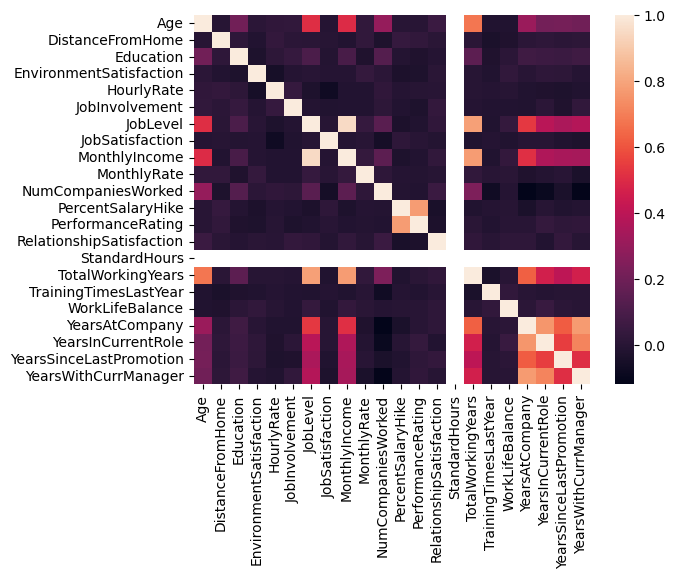

In [7]:
#Below is the heatmap showing correlation amongst the numerical variables in the HR dataset
sns.heatmap(HR_Analytics.corr(numeric_only=True))

### From the heatmap we can remove one of the variables from the pair which are high correlated since
### it would not make sense to keep both in the pair to reduce bias in the modeling

Below are the variables that we will remove :

##### Total working years- 
We will choose Age and remove Total working years since its obvious that with people with more age in organization will naturally have moew working years as well especially in case of higher posts like managers or people at leadership positions.

##### Job level -
We will remove job level and take monthly income since income increase with increase in job level and job level might not impact Attrition since there can be cases where employees are at good position but are not satisfied with salary and hence salary becomes more contributing to Attrition.

##### Years in Current Role , Years since last promotion and Years with Current Manager
WE will remove all these since all of these are highly correlated to "Years at Company" which should be sufficient to include as our predictor in stead of keeping all four. 

In [96]:
#Removing redundant columns from the HR dataset after filtering the numerical variables identifed in heatmap
HR_Analytics=HR_Analytics.drop(axis=1,columns=["TotalWorkingYears","JobLevel", "YearsInCurrentRole", "YearsSinceLastPromotion","YearsWithCurrManager"])

In [120]:
HR_Analytics.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

C:\Users\duapr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


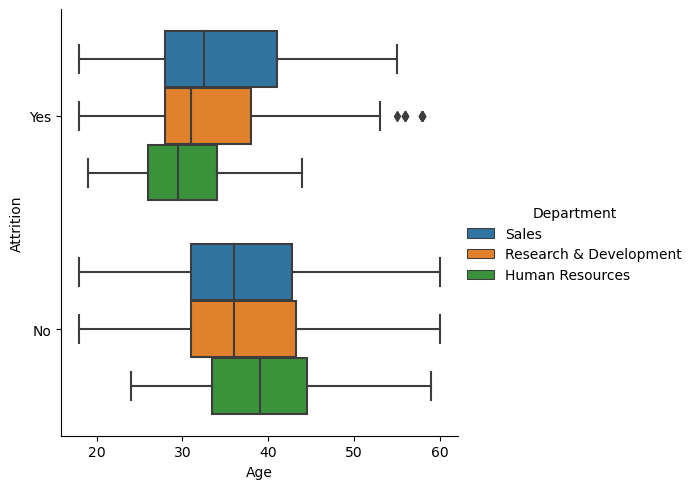

In [15]:
# Catplot is used here to shows how Attrition is related to Age and is plotted for both Males and Females in the organization
sns.catplot(data=HR_Analytics, y="Attrition", x="Age",kind="box",hue="Department")

### Age has some relation with Attrition as the median here suggests that Attrition is more in younger people than the older ones

C:\Users\duapr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


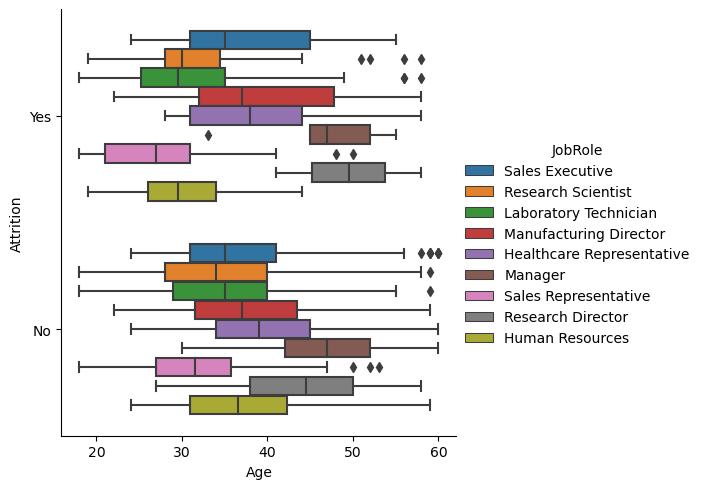

In [16]:
sns.catplot(data=HR_Analytics, y="Attrition", x="Age",kind="box",hue="JobRole")

C:\Users\duapr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


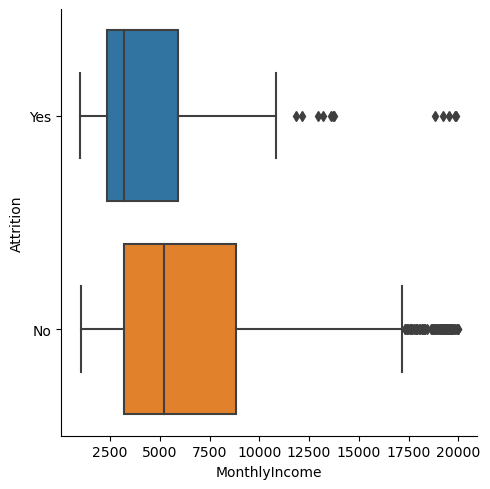

In [18]:
sns.catplot(data=HR_Analytics, y="Attrition", x="MonthlyIncome",kind="box")

# LOGISTIC CLASSIFICATION OF ATTRITION IN HR DATASET

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [38]:
y=HR_Analytics['Attrition']
X=HR_Analytics.drop(['Attrition','TrainingTimesLastYear','EmployeeNumber'], axis=1)
X

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany
0,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,3,...,Single,5993,19479,8,Yes,11,3,1,1,6
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,2,...,Married,5130,24907,1,No,23,4,4,3,10
2,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,2,...,Single,2090,2396,6,Yes,15,3,2,3,0
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,3,...,Married,2909,23159,1,Yes,11,3,3,3,8
4,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,3,...,Married,3468,16632,9,No,12,3,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,Research & Development,23,2,Medical,3,Male,41,4,...,Married,2571,12290,4,No,17,3,3,3,5
1466,39,Travel_Rarely,Research & Development,6,1,Medical,4,Male,42,2,...,Married,9991,21457,4,No,15,3,1,3,7
1467,27,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,87,4,...,Married,6142,5174,1,Yes,20,4,2,3,6
1468,49,Travel_Frequently,Sales,2,3,Medical,4,Male,63,2,...,Married,5390,13243,2,No,14,3,4,2,9


In [39]:
X=pd.get_dummies(X,drop_first=True)
X

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,2,2,94,3,4,5993,19479,8,...,False,False,False,False,False,True,False,False,True,True
1,49,8,1,3,61,2,2,5130,24907,1,...,False,False,False,False,True,False,False,True,False,False
2,37,2,2,4,92,2,3,2090,2396,6,...,True,False,False,False,False,False,False,False,True,True
3,33,3,4,4,56,3,3,2909,23159,1,...,False,False,False,False,True,False,False,True,False,True
4,27,2,1,1,40,3,2,3468,16632,9,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,3,41,4,4,2571,12290,4,...,True,False,False,False,False,False,False,True,False,False
1466,39,6,1,4,42,2,1,9991,21457,4,...,False,False,False,False,False,False,False,True,False,False
1467,27,4,3,2,87,4,2,6142,5174,1,...,False,False,True,False,False,False,False,True,False,True
1468,49,2,3,4,63,2,2,5390,13243,2,...,False,False,False,False,False,True,False,True,False,False


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [42]:
HR_logistic = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\duapr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
HR_predict = HR_logistic.predict(X_test)
HR_predict

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'N

In [44]:
X_test

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
455,33,1,5,1,95,4,3,16184,22578,4,...,False,False,False,True,False,False,False,False,False,False
472,37,1,4,2,65,3,2,6447,15701,6,...,False,False,True,False,False,False,False,True,False,False
642,38,9,3,2,98,2,2,2899,12102,0,...,False,False,False,False,False,False,True,True,False,False
962,51,5,3,3,84,3,2,14026,17588,1,...,False,True,False,False,False,False,False,False,False,True
690,31,12,3,4,41,3,4,5855,17369,0,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,31,2,1,4,59,1,4,1129,17536,1,...,True,False,False,False,False,False,False,False,False,True
1440,36,4,2,4,97,3,2,5131,9192,7,...,False,False,True,False,False,False,False,False,False,False
538,41,1,3,4,59,2,3,19189,19562,1,...,False,True,False,False,False,False,False,True,False,False
255,25,1,3,1,62,3,3,4898,7505,0,...,False,False,True,False,False,False,False,True,False,False


# PROBABILITY ANALYSIS

In [45]:
# We used proba function to determine confidence of the model for predicting the probabilitiy of Attrition Outcome used for Logistic classification
#for each of the rows in the test data
HR_prob = HR_logistic.predict_proba(X_test)
HR_prob

array([[0.95763901, 0.04236099],
       [0.83348838, 0.16651162],
       [0.82099465, 0.17900535],
       ...,
       [0.98480252, 0.01519748],
       [0.85791917, 0.14208083],
       [0.99304818, 0.00695182]])

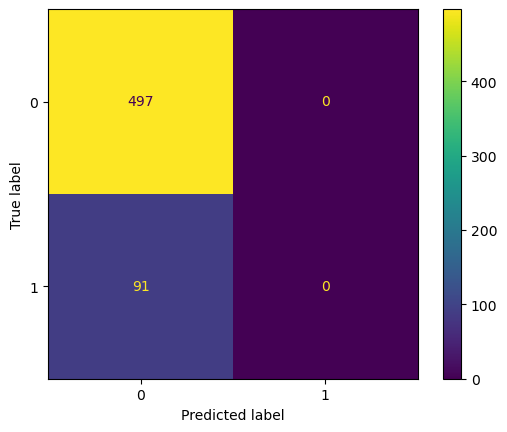

In [46]:
#Code to display confusion matrix for Logistic Classification
cm=confusion_matrix(y_test, HR_predict)
displ = ConfusionMatrixDisplay(cm)
displ.plot()

In [47]:
#Code to display confusion matrix summary statistics
print(classification_report(y_test,HR_predict))

              precision    recall  f1-score   support

          No       0.85      1.00      0.92       497
         Yes       0.00      0.00      0.00        91

    accuracy                           0.85       588
   macro avg       0.42      0.50      0.46       588
weighted avg       0.71      0.85      0.77       588



C:\Users\duapr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\duapr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\duapr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.linear_model import RidgeClassifierCV

from sklearn import tree

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV,
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [49]:

Hr_Ridge=RidgeClassifierCV(alphas=[0.05,0.1,0.5],cv=5).fit(X,y)

In [50]:
HR_Ridge_predict=Hr_Ridge.predict(X_test)
HR_Ridge_predict

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'N

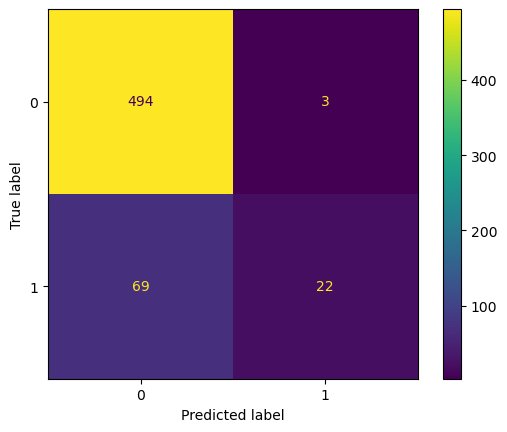

In [51]:
#Code to display confusion matrix for Ridge Classification
cm2=confusion_matrix(y_test, HR_Ridge_predict)
displ = ConfusionMatrixDisplay(cm2)
displ.plot()

In [52]:
#Code to display confusion matrix summary for Ridge Classification
print(classification_report(y_test,HR_Ridge_predict))

              precision    recall  f1-score   support

          No       0.88      0.99      0.93       497
         Yes       0.88      0.24      0.38        91

    accuracy                           0.88       588
   macro avg       0.88      0.62      0.66       588
weighted avg       0.88      0.88      0.85       588

